### importing libraries

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Load the dataset and displays first two rows


In [44]:
data = pd.read_csv('D:/forestfires.csv')
print(data.head(2))


  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   

   monthsep  size_category  
0         0          small  
1         0          small  

[2 rows x 31 columns]


In [96]:
# Feature selection
features = [
      'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
target = ['area' ]


In [98]:
# Extract features and target variable
X = data[features].values
y = data[target].values


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [104]:
# Define the neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))  # Output layer for regression



D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',metrics=["accuracy"])


In [124]:
# Train the model
history = model.fit(X_train, y_train, epochs=50,validation_split=0.2,  )


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.0095 - loss: 3371.0632 - val_accuracy: 0.0000e+00 - val_loss: 573.6151
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0089 - loss: 1354.2382 - val_accuracy: 0.0000e+00 - val_loss: 573.0585
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0028 - loss: 2950.8806 - val_accuracy: 0.0000e+00 - val_loss: 578.7197
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0050 - loss: 2049.1765 - val_accuracy: 0.0000e+00 - val_loss: 581.2250
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0063 - loss: 2129.6726 - val_accuracy: 0.0000e+00 - val_loss: 582.8890
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0053 - loss: 2642.7405 - val_accuracy: 0.0000e+00 - val_loss: 584.4166
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0035 - loss: 4847.0557 - val_accuracy: 0.0000e+00 - val_loss: 583.9636
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step -

In [112]:
# Evaluate the model
loss_and_metrics = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss_and_metrics}')
print(f'Accuracy: {loss_and_metrics}')



Test Loss: [11709.140625, 0.009615384973585606]
Accuracy: [11709.140625, 0.009615384973585606]


In [128]:
# Make predictions on the test set
predict = model.predict(X_test)
predict

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


array([[ 18.474157  ],
       [  1.9586952 ],
       [ 33.86939   ],
       [  4.2877765 ],
       [ 10.104067  ],
       [  4.3719172 ],
       [  8.337936  ],
       [ 17.50407   ],
       [ 12.531827  ],
       [  5.6344757 ],
       [ 27.237783  ],
       [  7.8055058 ],
       [  1.0798779 ],
       [ 15.054226  ],
       [  5.919997  ],
       [  5.57727   ],
       [  5.375578  ],
       [ -0.81735086],
       [ 12.455433  ],
       [ 15.069041  ],
       [  8.666745  ],
       [  0.15706922],
       [  6.528972  ],
       [ 12.690588  ],
       [  6.5867386 ],
       [ 19.360142  ],
       [  2.2601793 ],
       [ 22.95559   ],
       [ 16.882456  ],
       [ 14.179013  ],
       [ 10.857568  ],
       [ 19.982859  ],
       [ 14.017409  ],
       [ 13.048285  ],
       [  5.044548  ],
       [ -4.136302  ],
       [ -2.4769123 ],
       [ 22.946371  ],
       [  8.058755  ],
       [ 10.017752  ],
       [ 25.641062  ],
       [ 12.690588  ],
       [  0.5348022 ],
       [ 16

In [116]:
# Make predictions on the test set
predict = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, predict)
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 11709.141079998688
Mean Absolute Error (MAE): 23.456132181057562
R-squared (R²): 0.006669717280198384


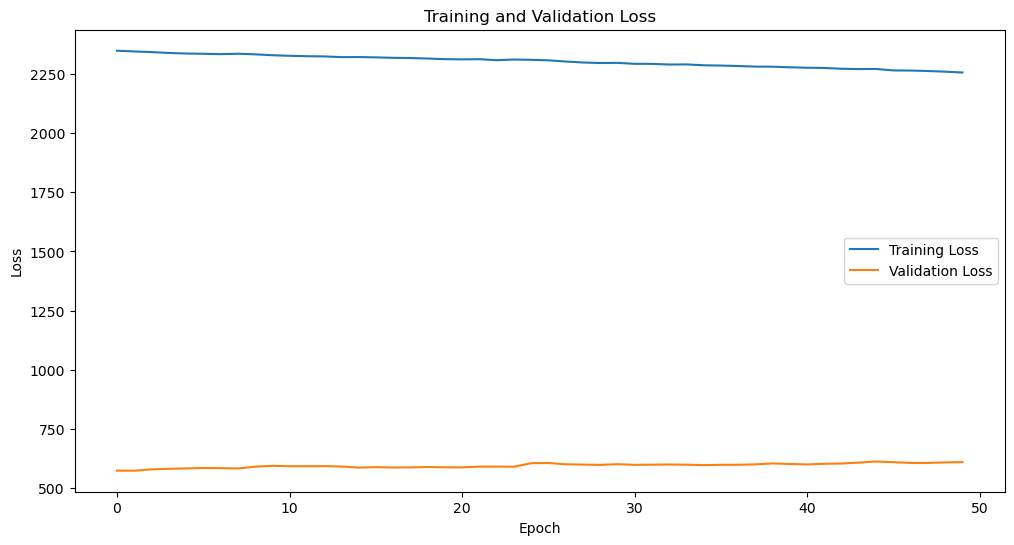

In [126]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


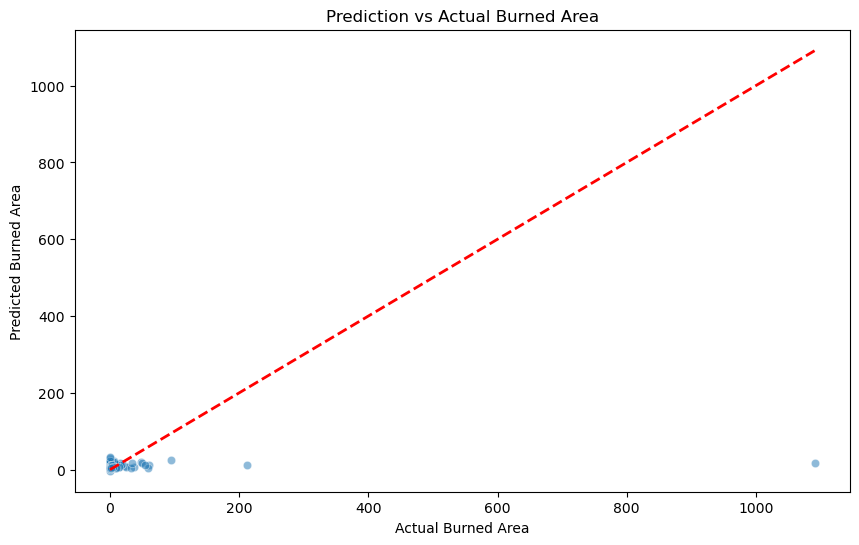

In [122]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predict, alpha=0.5, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  
plt.xlabel('Actual Burned Area')
plt.ylabel('Predicted Burned Area')
plt.title('Prediction vs Actual Burned Area')
plt.show()
